# STA Tutorial – Load data and plot figures

This notebook shows how to:
1. **View one trial (4 Hz flicker)** – stim sync and contrast in one figure (no spikes)
2. **View several trials (flicker)** – multiple trials’ contrast overlaid in one figure
3. **Compute and view the STA** – spike-triggered average; contrast is aligned to stim frame edges so it changes only when the frame changes (handles skips in the stim signal)

**How to use:** Run the cells in order from top to bottom. You can re-run any cell to refresh the figure.

---
## Step 0: Install required packages (one-time)

If you haven't already, run the cell below to install the packages. You only need to do this once per computer (or environment).

**Option A:** Uncomment and run the line below to install from `requirements.txt`:

**Option B:** Or run in a terminal: `pip install -r requirements.txt`

In [ ]:
# Uncomment the next line to install packages, then run this cell:
# %pip install -r requirements.txt

---
## Step 1: Setup – where is your data?

**Edit the two lines below** if your data lives somewhere else:
- `FILEPATH` = folder that contains a `data` subfolder with your `.abf` and `.csv` files
- `CSV_NAME` = name of the contrast CSV file (e.g. the one that matches your stimulus)

Then **run this cell** (Shift+Enter).

In [1]:
from pathlib import Path
from Neitz import Neitz

# Where your data lives (folder that contains a "data" subfolder)
FILEPATH = Path.cwd()
CSV_NAME = "achromatic_gaussian_120s_60Hz_seed1234_20260204_160729.csv"

# Settings used for loading (you usually don't need to change these)
NEITZ_KW = dict(
    filepath=FILEPATH,
    sweep=0,
    spike_ch_num=0,
    stim_ch_num=2,
    peak_height=20.0,
    stim_threshold=0.02,
    sta_win_s=0.2,
    t_omit_on=1.0,
    csv_path=FILEPATH / "data" / CSV_NAME,
)
STIM_KW = dict(active_high=False, long_pause_s=0.5, search_from_s=2.0)

print("Setup done. FILEPATH =", FILEPATH)

Setup done. FILEPATH = d:\github\Neitz_software_suite\Neitz_Analysis_Suite


---
## Step 2: Example 1 – One trial (simple 4 Hz flicker)

Load **one** recording and show the raw voltage trace with grey shaded boxes marking stimulus ON blocks.

**Run the cell below.** Change `abf_name` if you want a different file. Edit the lines under "Customize the figure below" to change the title, axis range, figure size, etc.

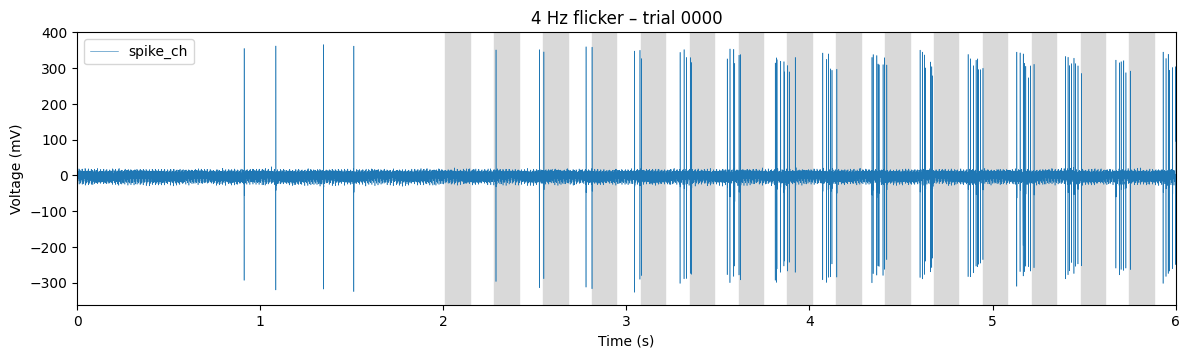

In [2]:
import matplotlib.pyplot as plt

abf_name = "2026_02_04_0000.abf"  # change this to your .abf filename if needed
duration_s = 6.0  # how many seconds to show

n = Neitz(**NEITZ_KW)
_, fig = n.load_trial_and_plot_flicker(
    abf_name,
    duration_s=duration_s,
    show=False,
    **STIM_KW,
)

# --- Customize the figure below ---
fig.set_size_inches(12, 4)                          # (width, height) in inches
fig.axes[0].set_title("4 Hz flicker – trial 0000")  # change title
fig.axes[0].set_xlim(0, 6)                          # x-axis range in seconds
# fig.axes[0].set_ylim(-50, 50)                     # uncomment to set y-axis range
# fig.savefig("flicker_single.png", dpi=300, bbox_inches="tight")  # uncomment to save

plt.show()

---
## Step 3: Example 2 – Multiple trials (4 Hz flicker)

Load **several** trials and plot the raw spike channel for each, vertically offset, with grey ON boxes from the stim signal.

**Run the cell below.** Edit `start` / `end` to change which trials are shown.

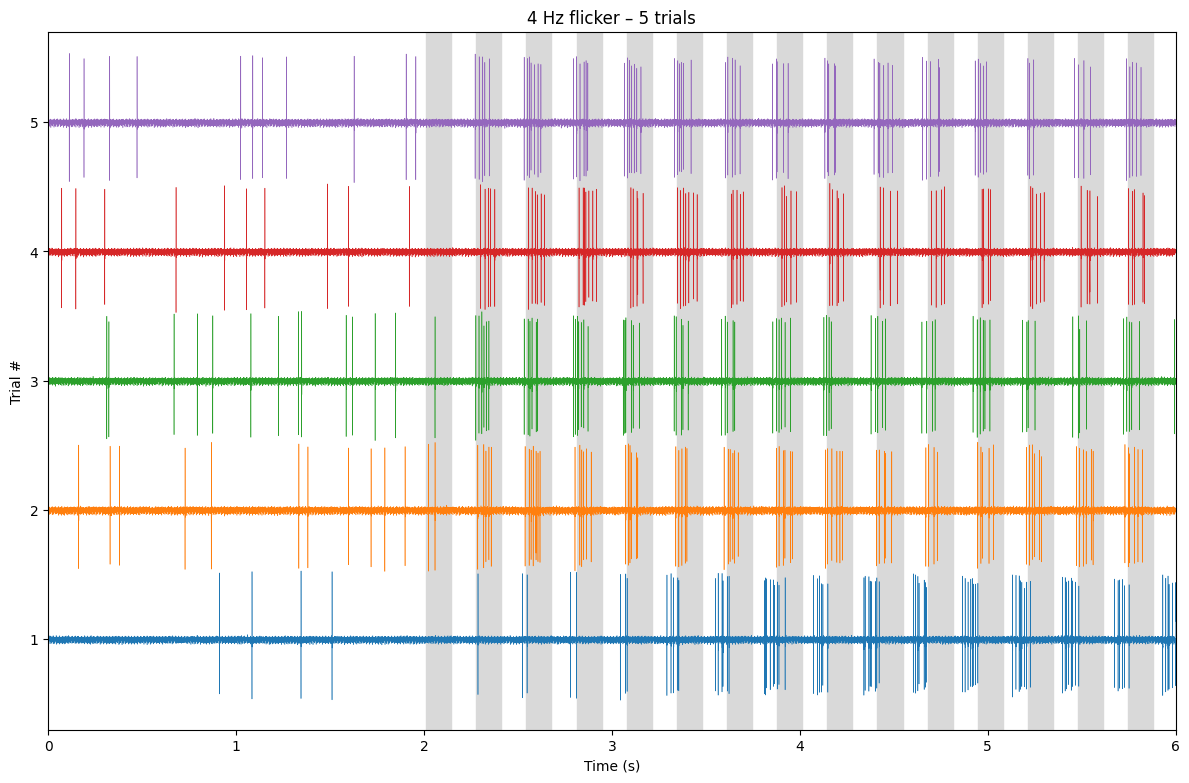

In [3]:
import matplotlib.pyplot as plt

# Edit start/end to change which trials are shown
start = 0
end = 4
abf_names = [f"2026_02_04_{i:04d}.abf" for i in range(start, end + 1)]
duration_s = 6.0  # seconds to show (starting from t=0)

trials, fig = Neitz.load_trials_and_plot_flicker(
    abf_names,
    csv_name=CSV_NAME,
    duration_s=duration_s,
    show=False,
    **NEITZ_KW,
)

# --- Customize the figure below ---
fig.set_size_inches(12, 8)                                    # (width, height) in inches
fig.axes[0].set_title(f"4 Hz flicker – {len(trials)} trials") # change title
fig.axes[0].set_xlim(0, 6)                                    # x-axis range in seconds
# fig.savefig("flicker_multi.png", dpi=300, bbox_inches="tight")  # uncomment to save

plt.show()

---
## Step 4: Example 3 – STA (spike-triggered average)

Load **multiple** trials, compute the spike-triggered average of contrast, and show the STA figure.

**Contrast alignment:** Contrast is aligned to the stim signal so it changes only when the frame changes (high–low transition). This corrects for skips or jitter in recorded frames.

**Run the cell below.**

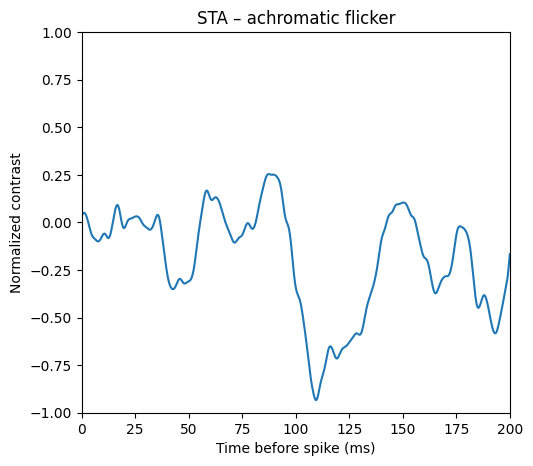

In [6]:
import matplotlib.pyplot as plt

# Edit start/end to change which trials are used
start = 5
end = 9
abf_names = [f"2026_02_04_{i:04d}.abf" for i in range(start, end + 1)]
smooth_ms = 1.0  # smoothing for the STA curve (0 = no smoothing)

trials, sta_t, sta_c, fig = Neitz.load_trials_sta_and_plot(
    abf_names,
    csv_name=CSV_NAME,
    smooth_ms=smooth_ms,
    show=False,
    **NEITZ_KW,
)

# --- Customize the figure below ---
fig.set_size_inches(5, 5)                          # (width, height) in inches
fig.axes[0].set_title("STA – achromatic flicker")   # change title
fig.axes[0].set_xlim(0,200)                       # x-axis range in ms
# fig.axes[0].set_ylim(-0.05, 0.10)                 # uncomment to set y-axis range
# fig.savefig("sta.png", dpi=300, bbox_inches="tight")  # uncomment to save

plt.show()